In [1]:
import numpy as np
from scipy import signal

import librosa
import librosa.display

import matplotlib.pyplot as plt

In [11]:
fs = 44100

audio, sr = librosa.load('data/audio_clips/Billy Kenny & Huxley - Sweat.mp3', sr=fs)

D:\Users\oguza\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [12]:
fc = 250 # cutoff Hz

wc = fc / (fs/2) # cutoff radians

lp = signal.firwin(5000, wc)

audio_cut = signal.convolve(audio,lp)

In [21]:
import soundfile as sf

In [22]:
# Write out audio as 24bit PCM WAV
sf.write("Billy Kenny & Huxley - Sweat_LP.wav", audio_cut, sr, subtype='PCM_24')

fc = 250 # cutoff Hz

wc = fc / (fs/2) # cut off radians

N = 500

lp = signal.firwin2(N, wc)


In [13]:
bpm = 125

total_bars = 1

total_beats = total_bars *4

time_interval = total_beats*60/bpm 

print('Interval length: {:.1f}s'.format(time_interval))

Interval length: 1.9s


In [15]:
start_time = 30.8
end_time = start_time+time_interval

start_idx = int(start_time*fs)
end_idx = int(end_time*fs)

audio_view = audio_cut[start_idx:end_idx]

In [16]:
n_fft = 1024
hop_length = int(n_fft/2)
# , win_length=512


amplitude_spectrogram = np.abs(librosa.stft(audio_view, n_fft=n_fft, hop_length=hop_length))

dB_spectrogram = librosa.amplitude_to_db(amplitude_spectrogram, np.max(amplitude_spectrogram))

power_spectrogram = librosa.db_to_power(dB_spectrogram, ref=1.0)

D:\Users\oguza\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
D:\Users\oguza\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
D:\Users\oguza\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


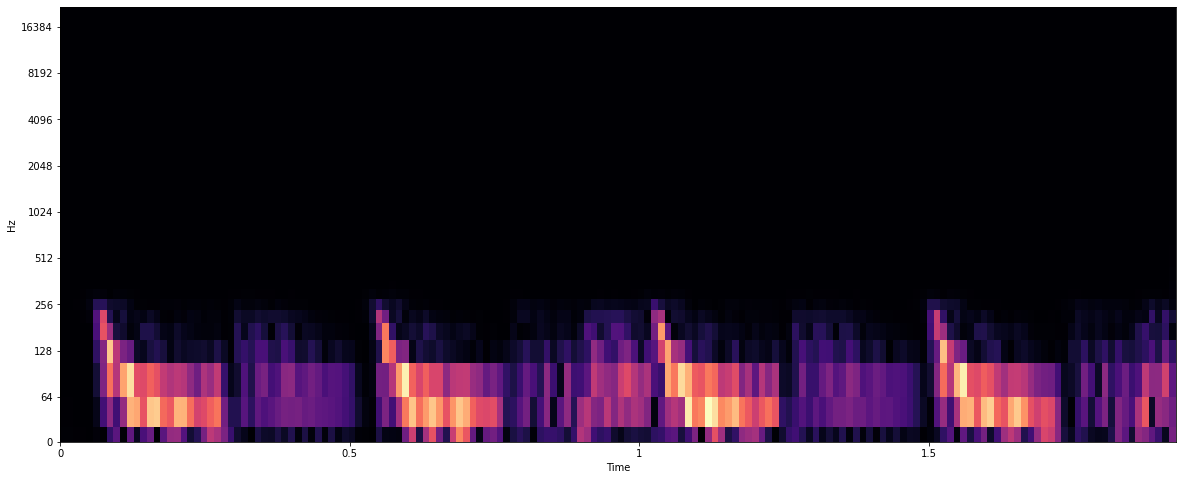

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
img = librosa.display.specshow(amplitude_spectrogram, sr=fs, hop_length=hop_length, x_axis='time', y_axis='log', ax=ax)
#fig.colorbar(img, ax=ax, format="%+2.f dB")

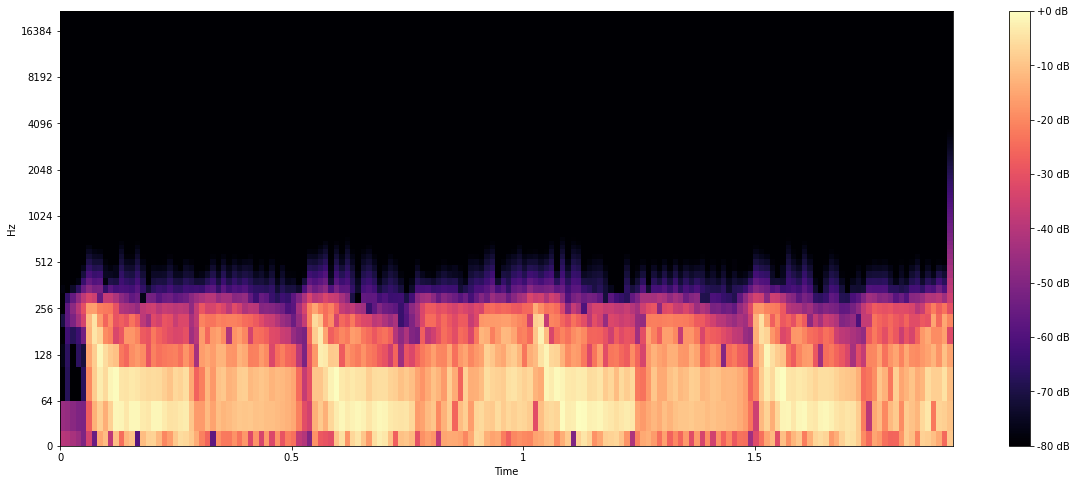

In [18]:
fig, ax = plt.subplots(figsize=(20,8))
img = librosa.display.specshow(dB_spectrogram, sr=fs, hop_length=hop_length, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

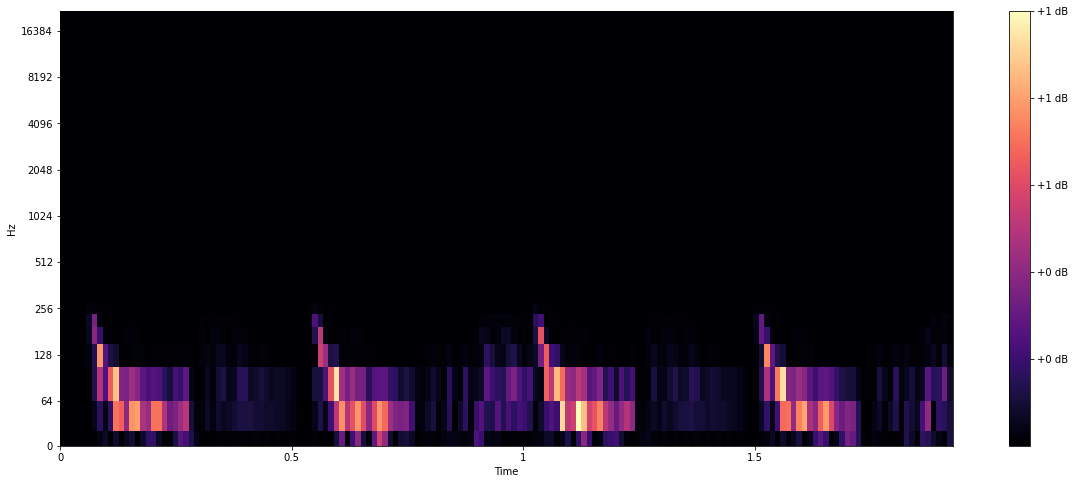

In [19]:
fig, ax = plt.subplots(figsize=(20,8))
img = librosa.display.specshow(power_spectrogram, sr=fs, hop_length=hop_length, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
hop_length = 128
n_fft = 1024

D = librosa.stft(audio_view, hop_length=hop_length, n_fft = n_fft)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
img = librosa.display.specshow(S_db, sr=fs, hop_length=hop_length, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
#plt.savefig('quarter_beats_apparent.png')

In [ ]:
audio_segment = audio[start_idx:end_idx]

n_fft = 4096
hop = int(n_fft/8)

f, t, Sxx = signal.spectrogram(audio_segment, 
                               fs, 
                               nperseg=hop, 
                               nfft=n_fft, 
                               return_onesided=True,
                              detrend=False)

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))

plt.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud')

plt.yscale('log')
#plt.ylim(int(np.log10(20)),int(np.log10(250)))
plt.ylim(10, 250)
plt.ylabel('Frequency [Hz]', size = 13)
plt.xlabel('Time [sec]', size = 13)
ax.tick_params(labelsize=13)

plt.show()
#plt.savefig('quarter_beats_apparent2.png')